<a href="https://colab.research.google.com/github/mariaweber22/SyntheticDataGeneration/blob/main/SyntheticDataGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# install packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sdv.datasets.demo import download_demo
from sdv.single_table import CTGANSynthesizer, TVAESynthesizer
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import evaluate_quality
from sdv.metrics.tabular import CSTest, LogisticDetection, SVCDetection
from sdv.evaluation.single_table import run_diagnostic
from sdv.evaluation.single_table import get_column_plot
from sdv.evaluation.single_table import get_column_pair_plot

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import preprocessing 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import graphviz
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#Create and Explore Dataframes

##Adult Dataset

In [ ]:
adult = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Synthetic Data Generation/adult.csv', sep=',')

In [ ]:
adult.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [ ]:
adult.tail()

age workclass  fnlwgt     education  education.num      marital.status  \
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K

In [ ]:
adult.shape

(32561, 15)

##Diabetes


In [ ]:
diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Synthetic Data Generation/diabetes.csv', sep=',')

In [ ]:
diabetes.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [ ]:
diabetes.shape

(100000, 9)

##Create Metadata

In [ ]:
# https://docs.sdv.dev/sdv/single-table-data/data-preparation/single-table-metadata-api
metadataAdult = SingleTableMetadata()
metadataDiabetes = SingleTableMetadata()

In [ ]:
metadataAdult.detect_from_dataframe(adult)
metadataDiabetes.detect_from_dataframe(diabetes)

In [ ]:
metadataAdult

{
    "columns": {
        "age": {
            "sdtype": "numerical"
        },
        "workclass": {
            "sdtype": "categorical"
        },
        "fnlwgt": {
            "sdtype": "numerical"
        },
        "education": {
            "sdtype": "categorical"
        },
        "education.num": {
            "sdtype": "numerical"
        },
        "marital.status": {
            "sdtype": "categorical"
        },
        "occupation": {
            "sdtype": "categorical"
        },
        "relationship": {
            "sdtype": "categorical"
        },
        "race": {
            "sdtype": "categorical"
        },
        "sex": {
            "sdtype": "categorical"
        },
        "capital.gain": {
            "sdtype": "numerical"
        },
        "capital.loss": {
            "sdtype": "numerical"
        },
        "hours.per.week": {
            "sdtype": "numerical"
        },
        "native.country": {
            "sdtype": "categorical"
        },
    

In [ ]:
metadataDiabetes

{
    "columns": {
        "gender": {
            "sdtype": "categorical"
        },
        "age": {
            "sdtype": "numerical"
        },
        "hypertension": {
            "sdtype": "numerical"
        },
        "heart_disease": {
            "sdtype": "numerical"
        },
        "smoking_history": {
            "sdtype": "categorical"
        },
        "bmi": {
            "sdtype": "numerical"
        },
        "HbA1c_level": {
            "sdtype": "numerical"
        },
        "blood_glucose_level": {
            "sdtype": "numerical"
        },
        "diabetes": {
            "sdtype": "numerical"
        }
    },
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1"
}

#CTGAN

##Adult

In [ ]:
# https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/ctgansynthesizer
ctganAdult = CTGANSynthesizer(metadataAdult, verbose = True) #für Epochs: verbose = True

In [ ]:
ctganAdult.fit(adult) # default 300 epochs

Epoch 1, Loss G:  1.5649,Loss D: -0.1647
Epoch 2, Loss G:  1.6017,Loss D:  0.1346
Epoch 3, Loss G:  0.7258,Loss D:  0.1127
Epoch 4, Loss G:  0.4519,Loss D:  0.2432
Epoch 5, Loss G:  0.3532,Loss D: -0.0710
Epoch 6, Loss G: -0.0692,Loss D: -0.0216
Epoch 7, Loss G: -0.1404,Loss D: -0.1494
Epoch 8, Loss G: -0.6469,Loss D:  0.0121
Epoch 9, Loss G: -0.5864,Loss D:  0.0571
Epoch 10, Loss G: -0.7912,Loss D:  0.0627
Epoch 11, Loss G: -1.0452,Loss D: -0.0062
Epoch 12, Loss G: -0.7167,Loss D: -0.0906
Epoch 13, Loss G: -0.7092,Loss D: -0.1698
Epoch 14, Loss G: -1.0033,Loss D: -0.3398
Epoch 15, Loss G: -0.8339,Loss D: -0.0884
Epoch 16, Loss G: -0.8047,Loss D: -0.2465
Epoch 17, Loss G: -0.7508,Loss D: -0.0862
Epoch 18, Loss G: -0.5233,Loss D: -0.1526
Epoch 19, Loss G: -0.4400,Loss D: -0.1667
Epoch 20, Loss G: -0.2778,Loss D: -0.3466
Epoch 21, Loss G: -0.4684,Loss D: -0.2059
Epoch 22, Loss G: -0.4996,Loss D: -0.0377
Epoch 23, Loss G: -0.3953,Loss D: -0.0191
Epoch 24, Loss G: -0.5220,Loss D: -0.2405
E

In [ ]:
# print out parameters
ctganAdult.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': True,
 'locales': None,
 'embedding_dim': 128,
 'generator_dim': (256, 256),
 'discriminator_dim': (256, 256),
 'generator_lr': 0.0002,
 'generator_decay': 1e-06,
 'discriminator_lr': 0.0002,
 'discriminator_decay': 1e-06,
 'batch_size': 500,
 'discriminator_steps': 1,
 'log_frequency': True,
 'verbose': True,
 'epochs': 300,
 'pac': 10,
 'cuda': True}

In [ ]:
# create 32561 synthetic samples
adultSyntheticCTGAN = ctganAdult.sample(num_rows = 32561)

In [ ]:
adultSyntheticCTGAN.head()

age         workclass  fnlwgt     education  education.num  \
0   23           Private  214425       HS-grad              9   
1   67           Private  195969       HS-grad              9   
2   55           Private  306173       7th-8th              4   
3   24           Private  127795       5th-6th              4   
4   50  Self-emp-not-inc  166018  Some-college             10   

       marital.status         occupation   relationship   race     sex  \
0  Married-civ-spouse     Prof-specialty        Husband  White    Male   
1             Widowed              Sales  Not-in-family  White    Male   
2           Separated    Priv-house-serv  Not-in-family  White  Female   
3       Never-married  Machine-op-inspct  Not-in-family  Other    Male   
4       Never-married  Handlers-cleaners  Not-in-family  White    Male   

   capital.gain  capital.loss  hours.per.week   native.country income  
0            34             0              46    United-States   >50K  
1            27             0              49    United-States  <=50K  
2             3             0              40    United-States  <=50K  
3            25             0              33  Trinadad&Tobago  <=50K  
4            11             0              31    United-States  <=50K

In [ ]:
# safe dataFrame as csv file
adultSyntheticCTGAN.to_csv('/content/drive/MyDrive/Colab Notebooks/Synthetic Data Generation/adultSyntheticCTGAN.csv', index=False)

##Diabetes

In [ ]:
# https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/ctgansynthesizer
ctganDiabetes = CTGANSynthesizer(metadataDiabetes, verbose = True) #für Epochs: verbose = True

In [ ]:
ctganDiabetes.fit(diabetes) # default 300 epochs

Epoch 1, Loss G: -0.3080,Loss D:  0.2135
Epoch 2, Loss G: -1.4497,Loss D:  0.0407
Epoch 3, Loss G: -1.7346,Loss D: -0.0763
Epoch 4, Loss G: -1.9607,Loss D:  0.1940
Epoch 5, Loss G: -2.0163,Loss D: -0.0132
Epoch 6, Loss G: -2.1468,Loss D:  0.0265
Epoch 7, Loss G: -2.1537,Loss D: -0.0442
Epoch 8, Loss G: -2.1002,Loss D:  0.0605
Epoch 9, Loss G: -2.3935,Loss D:  0.1266
Epoch 10, Loss G: -2.1939,Loss D: -0.0556
Epoch 11, Loss G: -2.2965,Loss D: -0.1298
Epoch 12, Loss G: -2.5149,Loss D:  0.0236
Epoch 13, Loss G: -2.3263,Loss D: -0.0832
Epoch 14, Loss G: -2.3188,Loss D:  0.0138
Epoch 15, Loss G: -2.4451,Loss D:  0.0652
Epoch 16, Loss G: -2.5852,Loss D:  0.0234
Epoch 17, Loss G: -2.3563,Loss D: -0.1079
Epoch 18, Loss G: -2.2455,Loss D: -0.1166
Epoch 19, Loss G: -2.4275,Loss D: -0.0315
Epoch 20, Loss G: -2.2555,Loss D:  0.0080
Epoch 21, Loss G: -2.2202,Loss D:  0.0464
Epoch 22, Loss G: -2.2685,Loss D: -0.0395
Epoch 23, Loss G: -2.0845,Loss D: -0.0310
Epoch 24, Loss G: -2.2085,Loss D: -0.0605
E

In [ ]:
# print out parameters
ctganDiabetes.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': True,
 'locales': None,
 'embedding_dim': 128,
 'generator_dim': (256, 256),
 'discriminator_dim': (256, 256),
 'generator_lr': 0.0002,
 'generator_decay': 1e-06,
 'discriminator_lr': 0.0002,
 'discriminator_decay': 1e-06,
 'batch_size': 500,
 'discriminator_steps': 1,
 'log_frequency': True,
 'verbose': True,
 'epochs': 300,
 'pac': 10,
 'cuda': True}

In [ ]:
# create 100000 synthetic samples
diabetesSyntheticCTGAN = ctganDiabetes.sample(num_rows = 100000)

In [ ]:
diabetesSyntheticCTGAN

gender    age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.00             1              1          former  27.36   
1        Male  39.83             0              0           never  25.40   
2      Female  20.25             0              0           never  21.89   
3        Male  73.53             1              0           never  49.59   
4      Female  54.73             0              0          former  30.41   
...       ...    ...           ...            ...             ...    ...   
99995  Female  79.36             0              0         current  24.58   
99996    Male  46.86             1              0           never  44.96   
99997  Female  49.52             0              0          former  52.06   
99998    Male  51.35             0              0     not current  28.78   
99999  Female  33.32             0              0         current  29.86   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.2                  155         1  
1              6.1                  127         0  
2              6.2                  199         0  
3              8.8                  300         1  
4              6.6                  128         0  
...            ...                  ...       ...  
99995          6.6                  143         0  
99996          7.8                  300         1  
99997          4.0                  201         0  
99998          5.0                  143         0  
99999          4.8                   83         0  

[100000 rows x 9 columns]

In [ ]:
diabetesSyntheticCTGAN.head()

gender    age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.00             1              1          former  27.36   
1    Male  39.83             0              0           never  25.40   
2  Female  20.25             0              0           never  21.89   
3    Male  73.53             1              0           never  49.59   
4  Female  54.73             0              0          former  30.41   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.2                  155         1  
1          6.1                  127         0  
2          6.2                  199         0  
3          8.8                  300         1  
4          6.6                  128         0

In [ ]:
# safe dataFrame as csv file
diabetesSyntheticCTGAN.to_csv('/content/drive/MyDrive/Colab Notebooks/Synthetic Data Generation/diabetesSyntheticCTGAN.csv', index=False)

#TVAE

##Adult

In [ ]:
tvaeAdult = TVAESynthesizer(metadataAdult)

In [ ]:
tvaeAdult.fit(adult)

In [ ]:
adultSyntheticTVAE = tvaeAdult.sample(num_rows = 32561)

In [ ]:
adultSyntheticTVAE.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   26   Private  262599  Some-college             10  Never-married   
1   42   Private  142859   Prof-school             15      Separated   
2   38   Private  162489     Assoc-voc             11      Separated   
3   21   Private  143778     Assoc-voc             11  Never-married   
4   21   Private  182596       HS-grad              9  Never-married   

      occupation   relationship                race     sex  capital.gain  \
0   Adm-clerical  Not-in-family               White  Female             1   
1              ?      Unmarried               White  Female             1   
2   Adm-clerical  Not-in-family  Asian-Pac-Islander  Female             1   
3  Other-service  Not-in-family               Black    Male             0   
4  Other-service      Own-child               White    Male             5   

   capital.loss  hours.per.week native.country income  
0             0              40  United-States  <=50K  
1             0              40  United-States  <=50K  
2             0              40  United-States  <=50K  
3             0              40  United-States  <=50K  
4             0              13  United-States  <=50K

In [ ]:
# safe dataFrame as csv file
adultSyntheticTVAE.to_csv('/content/drive/MyDrive/Colab Notebooks/Synthetic Data Generation/adultSyntheticTVAE.csv', index=False)

##Diabetes

In [ ]:
tvaeDiabetes = TVAESynthesizer(metadataDiabetes)

In [ ]:
tvaeDiabetes.fit(diabetes)

In [ ]:
diabetesSyntheticTVAE = tvaeDiabetes.sample(num_rows = 100000)

In [ ]:
diabetesSyntheticTVAE.head()

gender    age  hypertension  heart_disease smoking_history    bmi  \
0    Male  46.04             0              0         current  27.32   
1    Male   3.98             0              0           never  16.33   
2  Female  32.70             0              0     not current  29.23   
3    Male  38.27             0              0           never  23.54   
4  Female  34.70             0              0         No Info  34.88   

   HbA1c_level  blood_glucose_level  diabetes  
0          5.7                  141         0  
1          6.0                  159         0  
2          3.5                  145         0  
3          6.5                   85         0  
4          6.6                  159         0

In [ ]:
evaluate_quality(diabetes, diabetesSyntheticTVAE, metadataDiabetes)

Creating report: 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]



Overall Quality Score: 91.71%

Properties:
Column Shapes: 91.78%
Column Pair Trends: 91.64%


In [ ]:
# safe dataFrame as csv file
diabetesSyntheticTVAE.to_csv('/content/drive/MyDrive/Colab Notebooks/Synthetic Data Generation/diabetesSyntheticTVAE.csv', index=False)

#Optional: Load Generated Dataframes

In [ ]:
adultSyntheticCTGAN = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Synthetic Data Generation/adultSyntheticCTGAN.csv', sep=',')
adultSyntheticTVAE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Synthetic Data Generation/adultSyntheticTVAE.csv', sep=',')

diabetesSyntheticCTGAN = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Synthetic Data Generation/diabetesSyntheticCTGAN.csv', sep=',')
diabetesSyntheticTVAE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Synthetic Data Generation/diabetesSyntheticTVAE.csv', sep=',')

adult = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Synthetic Data Generation/adult.csv', sep=',')
diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Synthetic Data Generation/diabetes.csv', sep=',')

In [ ]:
adultSyntheticCTGAN.head()

age         workclass  fnlwgt     education  education.num  \
0   23           Private  214425       HS-grad              9   
1   67           Private  195969       HS-grad              9   
2   55           Private  306173       7th-8th              4   
3   24           Private  127795       5th-6th              4   
4   50  Self-emp-not-inc  166018  Some-college             10   

       marital.status         occupation   relationship   race     sex  \
0  Married-civ-spouse     Prof-specialty        Husband  White    Male   
1             Widowed              Sales  Not-in-family  White    Male   
2           Separated    Priv-house-serv  Not-in-family  White  Female   
3       Never-married  Machine-op-inspct  Not-in-family  Other    Male   
4       Never-married  Handlers-cleaners  Not-in-family  White    Male   

   capital.gain  capital.loss  hours.per.week   native.country income  
0            34             0              46    United-States   >50K  
1            27             0              49    United-States  <=50K  
2             3             0              40    United-States  <=50K  
3            25             0              33  Trinadad&Tobago  <=50K  
4            11             0              31    United-States  <=50K

In [ ]:
adultSyntheticTVAE.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   26   Private  262599  Some-college             10  Never-married   
1   42   Private  142859   Prof-school             15      Separated   
2   38   Private  162489     Assoc-voc             11      Separated   
3   21   Private  143778     Assoc-voc             11  Never-married   
4   21   Private  182596       HS-grad              9  Never-married   

      occupation   relationship                race     sex  capital.gain  \
0   Adm-clerical  Not-in-family               White  Female             1   
1              ?      Unmarried               White  Female             1   
2   Adm-clerical  Not-in-family  Asian-Pac-Islander  Female             1   
3  Other-service  Not-in-family               Black    Male             0   
4  Other-service      Own-child               White    Male             5   

   capital.loss  hours.per.week native.country income  
0             0              40  United-States  <=50K  
1             0              40  United-States  <=50K  
2             0              40  United-States  <=50K  
3             0              40  United-States  <=50K  
4             0              13  United-States  <=50K

In [ ]:
diabetesSyntheticCTGAN.head()

gender    age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.00             1              1          former  27.36   
1    Male  39.83             0              0           never  25.40   
2  Female  20.25             0              0           never  21.89   
3    Male  73.53             1              0           never  49.59   
4  Female  54.73             0              0          former  30.41   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.2                  155         1  
1          6.1                  127         0  
2          6.2                  199         0  
3          8.8                  300         1  
4          6.6                  128         0

In [ ]:
diabetesSyntheticTVAE.head()

gender    age  hypertension  heart_disease smoking_history    bmi  \
0    Male  46.04             0              0         current  27.32   
1    Male   3.98             0              0           never  16.33   
2  Female  32.70             0              0     not current  29.23   
3    Male  38.27             0              0           never  23.54   
4  Female  34.70             0              0         No Info  34.88   

   HbA1c_level  blood_glucose_level  diabetes  
0          5.7                  141         0  
1          6.0                  159         0  
2          3.5                  145         0  
3          6.5                   85         0  
4          6.6                  159         0

#Evaluation

##Quality Report

###Adult

CTGAN

In [ ]:
# https://docs.sdv.dev/sdv/single-table-data/evaluation
# https://docs.sdv.dev/sdmetrics/reports/quality-report/single-table-api
quality_report = evaluate_quality(
    real_data = adult,
    synthetic_data = adultSyntheticCTGAN,
    metadata = metadataAdult
)

Creating report: 100%|██████████| 4/4 [00:04<00:00,  1.10s/it]



Overall Quality Score: 86.93%

Properties:
Column Shapes: 86.31%
Column Pair Trends: 87.55%


In [ ]:
quality_report.get_details(property_name='Column Shapes')

Column        Metric  Quality Score
0              age  KSComplement       0.871533
1           fnlwgt  KSComplement       0.907405
2    education.num  KSComplement       0.952581
3     capital.gain  KSComplement       0.232732
4     capital.loss  KSComplement       0.878689
5   hours.per.week  KSComplement       0.918276
6        workclass  TVComplement       0.880501
7        education  TVComplement       0.929394
8   marital.status  TVComplement       0.920703
9       occupation  TVComplement       0.842726
10    relationship  TVComplement       0.906514
11            race  TVComplement       0.937686
12             sex  TVComplement       0.908510
13  native.country  TVComplement       0.879580
14          income  TVComplement       0.979515

In [ ]:
fig = quality_report.get_visualization(property_name='Column Shapes')
fig.show()

In [ ]:
quality_report.get_details(property_name='Column Pair Trends')

Column 1        Column 2                 Metric  Quality Score  \
0               age          fnlwgt  CorrelationSimilarity       0.995568   
1               age   education.num  CorrelationSimilarity       0.978226   
2               age    capital.gain  CorrelationSimilarity       0.975144   
3               age    capital.loss  CorrelationSimilarity       0.985068   
4               age  hours.per.week  CorrelationSimilarity       0.971682   
..              ...             ...                    ...            ...   
100    capital.gain          income  ContingencySimilarity       0.979270   
101    capital.loss  native.country  ContingencySimilarity       0.877430   
102    capital.loss          income  ContingencySimilarity       0.963300   
103  hours.per.week  native.country  ContingencySimilarity       0.831946   
104  hours.per.week          income  ContingencySimilarity       0.844722   

     Real Correlation  Synthetic Correlation  
0           -0.076646              -0.085509  
1            0.036527              -0.007021  
2            0.077674               0.127386  
3            0.057775               0.027910  
4            0.068756               0.125392  
..                ...                    ...  
100               NaN                    NaN  
101               NaN                    NaN  
102               NaN                    NaN  
103               NaN                    NaN  
104               NaN                    NaN  

[105 rows x 6 columns]

In [ ]:
fig = quality_report.get_visualization(property_name='Column Pair Trends')
fig.show()

TVAE

In [ ]:
quality_report = evaluate_quality(
    real_data = adult,
    synthetic_data = adultSyntheticTVAE,
    metadata = metadataAdult
)

Creating report: 100%|██████████| 4/4 [00:08<00:00,  2.19s/it]



Overall Quality Score: 89.4%

Properties:
Column Shapes: 90.09%
Column Pair Trends: 88.72%


In [ ]:
quality_report.get_details(property_name='Column Shapes')

Column        Metric  Quality Score
0              age  KSComplement       0.933663
1           fnlwgt  KSComplement       0.842020
2    education.num  KSComplement       0.968951
3     capital.gain  KSComplement       0.529683
4     capital.loss  KSComplement       0.957987
5   hours.per.week  KSComplement       0.867111
6        workclass  TVComplement       0.916526
7        education  TVComplement       0.922883
8   marital.status  TVComplement       0.971070
9       occupation  TVComplement       0.810049
10    relationship  TVComplement       0.931482
11            race  TVComplement       0.980652
12             sex  TVComplement       0.999908
13  native.country  TVComplement       0.908602
14          income  TVComplement       0.972360

In [ ]:
fig = quality_report.get_visualization(property_name='Column Shapes')
fig.show()

In [ ]:
quality_report.get_details(property_name='Column Pair Trends')

Column 1        Column 2                 Metric  Quality Score  \
0               age          fnlwgt  CorrelationSimilarity       0.989896   
1               age   education.num  CorrelationSimilarity       0.954866   
2               age    capital.gain  CorrelationSimilarity       0.989958   
3               age    capital.loss  CorrelationSimilarity       0.995285   
4               age  hours.per.week  CorrelationSimilarity       0.971148   
..              ...             ...                    ...            ...   
100    capital.gain          income  ContingencySimilarity       0.972114   
101    capital.loss  native.country  ContingencySimilarity       0.892755   
102    capital.loss          income  ContingencySimilarity       0.951629   
103  hours.per.week  native.country  ContingencySimilarity       0.737355   
104  hours.per.week          income  ContingencySimilarity       0.790332   

     Real Correlation  Synthetic Correlation  
0           -0.076646              -0.056438  
1            0.036527              -0.053740  
2            0.077674               0.097758  
3            0.057775               0.067204  
4            0.068756               0.126459  
..                ...                    ...  
100               NaN                    NaN  
101               NaN                    NaN  
102               NaN                    NaN  
103               NaN                    NaN  
104               NaN                    NaN  

[105 rows x 6 columns]

In [ ]:
fig = quality_report.get_visualization(property_name='Column Pair Trends')
fig.show()

###Diabetes

CTGAN

In [ ]:
# https://docs.sdv.dev/sdv/single-table-data/evaluation
# https://docs.sdv.dev/sdmetrics/reports/quality-report/single-table-api
quality_report = evaluate_quality(
    real_data = diabetes,
    synthetic_data = diabetesSyntheticCTGAN,
    metadata = metadataDiabetes
)

Creating report: 100%|██████████| 4/4 [00:04<00:00,  1.19s/it]



Overall Quality Score: 92.95%

Properties:
Column Shapes: 92.77%
Column Pair Trends: 93.14%


In [ ]:
quality_report.get_details(property_name='Column Shapes')

Column        Metric  Quality Score
0                  age  KSComplement        0.92906
1         hypertension  KSComplement        0.98366
2        heart_disease  KSComplement        0.98528
3                  bmi  KSComplement        0.81912
4          HbA1c_level  KSComplement        0.94565
5  blood_glucose_level  KSComplement        0.86124
6             diabetes  KSComplement        0.97704
7               gender  TVComplement        0.91494
8      smoking_history  TVComplement        0.93310

In [ ]:
fig = quality_report.get_visualization(property_name='Column Shapes')
fig.show()

In [ ]:
quality_report.get_details(property_name='Column Pair Trends')

Column 1             Column 2                 Metric  \
0                   age         hypertension  CorrelationSimilarity   
1                   age        heart_disease  CorrelationSimilarity   
2                   age                  bmi  CorrelationSimilarity   
3           HbA1c_level                  age  CorrelationSimilarity   
4                   age  blood_glucose_level  CorrelationSimilarity   
5                   age             diabetes  CorrelationSimilarity   
6         heart_disease         hypertension  CorrelationSimilarity   
7                   bmi         hypertension  CorrelationSimilarity   
8           HbA1c_level         hypertension  CorrelationSimilarity   
9   blood_glucose_level         hypertension  CorrelationSimilarity   
10             diabetes         hypertension  CorrelationSimilarity   
11                  bmi        heart_disease  CorrelationSimilarity   
12          HbA1c_level        heart_disease  CorrelationSimilarity   
13  blood_glucose_level        heart_disease  CorrelationSimilarity   
14             diabetes        heart_disease  CorrelationSimilarity   
15          HbA1c_level                  bmi  CorrelationSimilarity   
16  blood_glucose_level                  bmi  CorrelationSimilarity   
17                  bmi             diabetes  CorrelationSimilarity   
18          HbA1c_level  blood_glucose_level  CorrelationSimilarity   
19          HbA1c_level             diabetes  CorrelationSimilarity   
20  blood_glucose_level             diabetes  CorrelationSimilarity   
21               gender      smoking_history  ContingencySimilarity   
22                  age               gender  ContingencySimilarity   
23               gender         hypertension  ContingencySimilarity   
24               gender        heart_disease  ContingencySimilarity   
25                  bmi               gender  ContingencySimilarity   
26          HbA1c_level               gender  ContingencySimilarity   
27  blood_glucose_level               gender  ContingencySimilarity   
28             diabetes               gender  ContingencySimilarity   
29                  age      smoking_history  ContingencySimilarity   
30         hypertension      smoking_history  ContingencySimilarity   
31        heart_disease      smoking_history  ContingencySimilarity   
32                  bmi      smoking_history  ContingencySimilarity   
33          HbA1c_level      smoking_history  ContingencySimilarity   
34  blood_glucose_level      smoking_history  ContingencySimilarity   
35             diabetes      smoking_history  ContingencySimilarity   

    Quality Score  Real Correlation  Synthetic Correlation  
0        0.994385          0.251171               0.262401  
1        0.989997          0.233354               0.213348  
2        0.971435          0.337396               0.280266  
3        0.979916          0.101354               0.061185  
4        0.969403          0.110672               0.171865  
5        0.974083          0.258008               0.309841  
6        0.961055          0.121262               0.199152  
7        0.971794          0.147666               0.204078  
8        0.916119          0.080939               0.248701  
9        0.900668          0.084429               0.283094  
10       0.892810          0.197823               0.412203  
11       0.976363          0.061198               0.013924  
12       0.984099          0.067589               0.099391  
13       0.977372          0.070066               0.115322  
14       0.993896          0.171727               0.159519  
15       0.994221          0.082997               0.094556  
16       0.967254          0.091261               0.156754  
17       0.938091          0.214357               0.338175  
18       0.956172          0.166733               0.254389  
19       0.987118          0.400660               0.426425  
20       0.956169          0.419558               0.331896  
21       0.840660               NaN          

In [ ]:
fig = quality_report.get_visualization(property_name='Column Pair Trends')
fig.show()

TVAE

In [ ]:
diabetesSyntheticTVAE

gender    age  hypertension  heart_disease smoking_history    bmi  \
0        Male  46.04             0              0         current  27.32   
1        Male   3.98             0              0           never  16.33   
2      Female  32.70             0              0     not current  29.23   
3        Male  38.27             0              0           never  23.54   
4      Female  34.70             0              0         No Info  34.88   
...       ...    ...           ...            ...             ...    ...   
99995  Female  37.70             0              0           never  27.20   
99996  Female  50.02             0              0           never  39.23   
99997  Female  63.10             0              0           never  27.32   
99998    Male  57.70             0              0           never  28.99   
99999  Female   0.83             0              0         No Info  16.74   

       HbA1c_level  blood_glucose_level  diabetes  
0              5.7                  141         0  
1              6.0                  159         0  
2              3.5                  145         0  
3              6.5                   85         0  
4              6.6                  159         0  
...            ...                  ...       ...  
99995          3.5                  155         0  
99996          5.7                  130         1  
99997          6.6                  159         1  
99998          6.0                  155         0  
99999          4.5                  155         0  

[100000 rows x 9 columns]

In [ ]:
unique_values = diabetesSyntheticTVAE['heart_disease'].unique()
unique_values

array([0, 1])

In [ ]:
quality_report = evaluate_quality(
    real_data = diabetes,
    synthetic_data = diabetesSyntheticTVAE,
    metadata = metadataDiabetes
)

Creating report: 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]



Overall Quality Score: 91.71%

Properties:
Column Shapes: 91.78%
Column Pair Trends: 91.64%


In [ ]:
quality_report.get_details(property_name='Column Shapes')

Column        Metric  Quality Score
0                  age  KSComplement        0.91540
1         hypertension  KSComplement        0.92523
2        heart_disease  KSComplement        0.96591
3                  bmi  KSComplement        0.77112
4          HbA1c_level  KSComplement        0.91250
5  blood_glucose_level  KSComplement        0.88483
6             diabetes  KSComplement        0.99279
7               gender  TVComplement        0.99416
8      smoking_history  TVComplement        0.89867

In [ ]:
fig = quality_report.get_visualization(property_name='Column Shapes')
fig.show()

In [ ]:
quality_report.get_details(property_name='Column Pair Trends')

Column 1             Column 2                 Metric  \
0                   age         hypertension  CorrelationSimilarity   
1                   age        heart_disease  CorrelationSimilarity   
2                   age                  bmi  CorrelationSimilarity   
3           HbA1c_level                  age  CorrelationSimilarity   
4                   age  blood_glucose_level  CorrelationSimilarity   
5                   age             diabetes  CorrelationSimilarity   
6         heart_disease         hypertension  CorrelationSimilarity   
7                   bmi         hypertension  CorrelationSimilarity   
8           HbA1c_level         hypertension  CorrelationSimilarity   
9   blood_glucose_level         hypertension  CorrelationSimilarity   
10             diabetes         hypertension  CorrelationSimilarity   
11                  bmi        heart_disease  CorrelationSimilarity   
12          HbA1c_level        heart_disease  CorrelationSimilarity   
13  blood_glucose_level        heart_disease  CorrelationSimilarity   
14             diabetes        heart_disease  CorrelationSimilarity   
15          HbA1c_level                  bmi  CorrelationSimilarity   
16  blood_glucose_level                  bmi  CorrelationSimilarity   
17                  bmi             diabetes  CorrelationSimilarity   
18          HbA1c_level  blood_glucose_level  CorrelationSimilarity   
19          HbA1c_level             diabetes  CorrelationSimilarity   
20  blood_glucose_level             diabetes  CorrelationSimilarity   
21               gender      smoking_history  ContingencySimilarity   
22                  age               gender  ContingencySimilarity   
23               gender         hypertension  ContingencySimilarity   
24               gender        heart_disease  ContingencySimilarity   
25                  bmi               gender  ContingencySimilarity   
26          HbA1c_level               gender  ContingencySimilarity   
27  blood_glucose_level               gender  ContingencySimilarity   
28             diabetes               gender  ContingencySimilarity   
29                  age      smoking_history  ContingencySimilarity   
30         hypertension      smoking_history  ContingencySimilarity   
31        heart_disease      smoking_history  ContingencySimilarity   
32                  bmi      smoking_history  ContingencySimilarity   
33          HbA1c_level      smoking_history  ContingencySimilarity   
34  blood_glucose_level      smoking_history  ContingencySimilarity   
35             diabetes      smoking_history  ContingencySimilarity   

    Quality Score  Real Correlation  Synthetic Correlation  
0        0.880935          0.251171               0.013041  
1        0.926113          0.233354               0.085580  
2        0.869015          0.337396               0.599365  
3        0.989938          0.101354               0.081230  
4        0.998701          0.110672               0.108073  
5        0.989091          0.258008               0.236191  
6        0.977431          0.121262               0.076124  
7        0.932330          0.147666               0.012326  
8        0.965165          0.080939               0.011269  
9        0.962328          0.084429               0.009084  
10       0.914400          0.197823               0.026623  
11       0.993850          0.061198               0.073498  
12       0.980535          0.067589               0.028659  
13       0.976721          0.070066               0.023507  
14       0.945810          0.171727               0.063346  
15       0.989605          0.082997               0.103787  
16       0.987785          0.091261               0.115692  
17       0.955180          0.214357               0.303996  
18       0.957607          0.166733               0.081946  
19       0.910629          0.400660               0.221919  
20       0.953759          0.419558               0.327076  
21       0.847250               NaN          

In [ ]:
fig = quality_report.get_visualization(property_name='Column Pair Trends')
fig.show()

##Run Diagnostic

###Adult

CTGAN

In [ ]:
diagnostic_report = run_diagnostic(
    real_data = adult,
    synthetic_data = adultSyntheticCTGAN,
    metadata = metadataAdult
)

Creating report: 100%|██████████| 4/4 [05:35<00:00, 83.82s/it] 


DiagnosticResults:

SUCCESS:
✓ The synthetic data covers over 90% of the categories present in the real data
✓ Over 90% of the synthetic rows are not copies of the real data
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data

! The synthetic data is missing more than 10% of the numerical ranges present in the real data


TVAE

In [ ]:
diagnostic_report = run_diagnostic(
    real_data = adult,
    synthetic_data = adultSyntheticTVAE,
    metadata = metadataAdult
)

Creating report: 100%|██████████| 4/4 [05:36<00:00, 84.17s/it] 


DiagnosticResults:

SUCCESS:
✓ Over 90% of the synthetic rows are not copies of the real data
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data

! The synthetic data is missing more than 10% of the numerical ranges present in the real data
! The synthetic data is missing more than 10% of the categories present in the real data


###Diabetes

CTGAN

In [ ]:
diagnostic_report = run_diagnostic(
    real_data = diabetes,
    synthetic_data = diabetesSyntheticCTGAN,
    metadata = metadataDiabetes
)

Creating report: 100%|██████████| 4/4 [04:27<00:00, 66.88s/it]


DiagnosticResults:

SUCCESS:
✓ The synthetic data covers over 90% of the numerical ranges present in the real data
✓ The synthetic data covers over 90% of the categories present in the real data
✓ Over 90% of the synthetic rows are not copies of the real data
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data


TVAE

In [ ]:
diagnostic_report = run_diagnostic(
    real_data = diabetes,
    synthetic_data = diabetesSyntheticTVAE,
    metadata = metadataDiabetes
)

Creating report: 100%|██████████| 4/4 [04:26<00:00, 66.64s/it]


DiagnosticResults:

SUCCESS:
✓ The synthetic data covers over 90% of the numerical ranges present in the real data
✓ Over 90% of the synthetic rows are not copies of the real data
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data

! The synthetic data is missing more than 10% of the categories present in the real data


##Column Plots

###Adult

CTGAN

In [ ]:
fig = get_column_plot(
    real_data = adult,
    synthetic_data = adultSyntheticCTGAN,
    metadata = metadataAdult,
    column_name='capital.gain',
)
    
fig.show()

TVAE

In [ ]:
fig = get_column_plot(
    real_data = adult,
    synthetic_data = adultSyntheticTVAE,
    metadata = metadataAdult,
    column_name='capital.gain',
)
    
fig.show()

##Column Pair Plot

###Adult

CTGAN

In [ ]:
fig = get_column_pair_plot(
    real_data = adult,
    synthetic_data = adultSyntheticCTGAN,
    metadata = metadataAdult,
    column_names=['occupation', 'native.country'])
    
fig.show()

TVAE

In [ ]:
fig = get_column_pair_plot(
    real_data = adult,
    synthetic_data = adultSyntheticTVAE,
    metadata = metadataAdult,
    column_names=['native.country', 'hours.per.week'])
    
fig.show()

##Decision Tree

###Adult Baseline

In [ ]:
# Umcodierung Spalte income in 0 und 1
income_map = {'>50K': 1, '<=50K': 0}
adultEncoded = adult
adultEncoded['income'] = adultEncoded['income'].map(income_map)
adultEncoded.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country  income  
0          4356              40  United-States       0  
1          4356              18  United-States       0  
2          4356              40  United-States       0  
3          3900              40  United-States       0  
4          3900              40  United-States       0

In [ ]:
adultEncoded = pd.get_dummies(adult)
adultEncoded.head()

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
0   90   77053              9             0          4356              40   
1   82  132870              9             0          4356              18   
2   66  186061             10             0          4356              40   
3   54  140359              4             0          3900              40   
4   41  264663             10             0          3900              40   

   income  workclass_?  workclass_Federal-gov  workclass_Local-gov  ...  \
0       0            1                      0                    0  ...   
1       0            0                      0                    0  ...   
2       0            1                      0                    0  ...   
3       0            0                      0                    0  ...   
4       0            0                      0                    0  ...   

   native.country_Portugal  native.country_Puerto-Rico  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   native.country_Scotland  native.country_South  native.country_Taiwan  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   

   native.country_Thailand  native.country_Trinadad&Tobago  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        0                               0   
4                        0                               0   

   native.country_United-States  native.country_Vietnam  \
0                             1                       0   
1                             1                       0   
2                             1                       0   
3                             1                       0   
4                             1                       0   

   native.country_Yugoslavia  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 109 columns]

In [ ]:
# Aufteilung in Features und Labels
X = adultEncoded.drop('income', axis=1)  # alle Merkmale ohne das Ziel (target) auswählen
y = adultEncoded['income']  # Ziel (target) auswählen

In [ ]:
X

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
0       90   77053              9             0          4356              40   
1       82  132870              9             0          4356              18   
2       66  186061             10             0          4356              40   
3       54  140359              4             0          3900              40   
4       41  264663             10             0          3900              40   
...    ...     ...            ...           ...           ...             ...   
32556   22  310152             10             0             0              40   
32557   27  257302             12             0             0              38   
32558   40  154374              9             0             0              40   
32559   58  151910              9             0             0              40   
32560   22  201490              9             0             0              20   

       workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0                1                      0                    0   
1                0                      0                    0   
2                1                      0                    0   
3                0                      0                    0   
4                0                      0                    0   
...            ...                    ...                  ...   
32556            0                      0                    0   
32557            0                      0                    0   
32558            0                      0                    0   
32559            0                      0                    0   
32560            0                      0                    0   

       workclass_Never-worked  ...  native.country_Portugal  \
0                           0  ...                        0   
1                           0  ...                        0   
2                           0  ...                        0   
3                           0  ...                        0   
4                           0  ...                        0   
...                       ...  ...                      ...   
32556                       0  ...                        0   
32557                       0  ...                        0   
32558                       0  ...                        0   
32559                       0  ...                        0   
32560                       0  ...                        0   

       native.country_Puerto-Rico  native.country_Scotland  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   
...                           ...                      ...   
32556                           0                        0   
32557                           0                        0   
32558                           0                        0   
32559                           0                        0   
32560                           0                        0   

       native.country_South  native.country_Taiwan  native.country_Thailand  \
0                         0                      0                        0   
1                         0                      0                        0   
2                         0                      0                        0   
3                         0                      0                        0   
4                         0                      0                        0   
...                     ...                    ...                      ...   
32556                     0                      0                        0   
32557                     0                      0                        0   
32558                     0 

In [ ]:
# Aufteilung der Datensätze in Trainings- und Testdatensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape  # 20 % test set

((26048, 108), (26048,), (6513, 108), (6513,))

In [ ]:
# Erstellen des Entscheidungsbaums
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=150, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=150, random_state=42)

In [ ]:
# Extrahiere die Feature Importance des trainierten Modells
importance = clf.feature_importances_

In [ ]:
# Erstelle einen DataFrame, der die Features und ihre Importance enthält
feat_imp = pd.DataFrame({'Features': X.columns, 'Importance': importance})
# Sortieren des DataFrames
feat_imp = feat_imp.sort_values('Importance', ascending=False)

print(feat_imp.head(20))

                             Features  Importance
33  marital.status_Married-civ-spouse    0.381567
2                       education.num    0.200152
3                        capital.gain    0.179215
4                        capital.loss    0.064314
0                                 age    0.054088
5                      hours.per.week    0.036959
1                              fnlwgt    0.015815
42         occupation_Exec-managerial    0.013751
12         workclass_Self-emp-not-inc    0.006967
48          occupation_Prof-specialty    0.006678
58                  relationship_Wife    0.004232
43         occupation_Farming-fishing    0.003945
26                  education_HS-grad    0.003885
46           occupation_Other-service    0.003649
11             workclass_Self-emp-inc    0.002446
51            occupation_Tech-support    0.002356
50                   occupation_Sales    0.002331
65                           sex_Male    0.002130
13                workclass_State-gov    0.002030


In [ ]:
# Vorhersage auf den Testdaten
y_pred = clf.predict(X_test)

In [ ]:
# Ausgabe der Genauigkeit des Entscheidungsbaums auf den Testdaten
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.8564409642253954


In [ ]:
y_pred_test = clf.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[4668,  308],
       [ 627,  910]])

True Negative  :  4668
False Positive :  308
False Negative :  627
True Positive  :  910


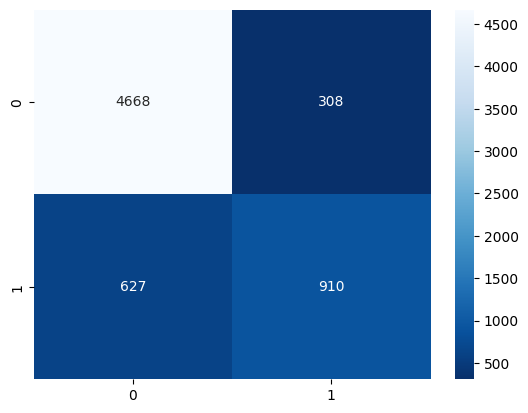

In [ ]:
# cm visualization
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

cm_test = confusion_matrix(y_test, y_pred_test)
f = sns.heatmap(cm_test, annot=True,cmap="Blues_r", fmt='g')
print ("True Negative  : ",tn)
print ("False Positive : ",fp)
print ("False Negative : ",fn)
print ("True Positive  : ",tp)

In [ ]:
print(classification_report(y_test, y_pred_test, digits = 3))

              precision    recall  f1-score   support

           0      0.882     0.938     0.909      4976
           1      0.747     0.592     0.661      1537

    accuracy                          0.856      6513
   macro avg      0.814     0.765     0.785      6513
weighted avg      0.850     0.856     0.850      6513



###Adult CTGAN

In [ ]:
# Umcodierung Spalte income in 0 und 1
adultSyntheticCTGAN['income'] = adultSyntheticCTGAN['income'].map(income_map)
adultSyntheticCTGAN.head()

age         workclass  fnlwgt     education  education.num  \
0   23           Private  214425       HS-grad              9   
1   67           Private  195969       HS-grad              9   
2   55           Private  306173       7th-8th              4   
3   24           Private  127795       5th-6th              4   
4   50  Self-emp-not-inc  166018  Some-college             10   

       marital.status         occupation   relationship   race     sex  \
0  Married-civ-spouse     Prof-specialty        Husband  White    Male   
1             Widowed              Sales  Not-in-family  White    Male   
2           Separated    Priv-house-serv  Not-in-family  White  Female   
3       Never-married  Machine-op-inspct  Not-in-family  Other    Male   
4       Never-married  Handlers-cleaners  Not-in-family  White    Male   

   capital.gain  capital.loss  hours.per.week   native.country  income  
0            34             0              46    United-States       1  
1            27             0              49    United-States       0  
2             3             0              40    United-States       0  
3            25             0              33  Trinadad&Tobago       0  
4            11             0              31    United-States       0

In [ ]:
# One-Hot-Encoding
adultCTGANEncoded = pd.get_dummies(adultSyntheticCTGAN)
adultCTGANEncoded.head()

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
0   23  214425              9            34             0              46   
1   67  195969              9            27             0              49   
2   55  306173              4             3             0              40   
3   24  127795              4            25             0              33   
4   50  166018             10            11             0              31   

   income  workclass_?  workclass_Federal-gov  workclass_Local-gov  ...  \
0       1            0                      0                    0  ...   
1       0            0                      0                    0  ...   
2       0            0                      0                    0  ...   
3       0            0                      0                    0  ...   
4       0            0                      0                    0  ...   

   native.country_Portugal  native.country_Puerto-Rico  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   native.country_Scotland  native.country_South  native.country_Taiwan  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   

   native.country_Thailand  native.country_Trinadad&Tobago  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        0                               1   
4                        0                               0   

   native.country_United-States  native.country_Vietnam  \
0                             1                       0   
1                             1                       0   
2                             1                       0   
3                             0                       0   
4                             1                       0   

   native.country_Yugoslavia  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 108 columns]

In [ ]:
# Aufteilung in Features und Labels
X = adultCTGANEncoded.drop('income', axis=1)  # alle Merkmale ohne das Ziel (target) auswählen
y = adultCTGANEncoded['income']  # Ziel (target) auswählen

In [ ]:
X

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
0       23  214425              9            34             0              46   
1       67  195969              9            27             0              49   
2       55  306173              4             3             0              40   
3       24  127795              4            25             0              33   
4       50  166018             10            11             0              31   
...    ...     ...            ...           ...           ...             ...   
32556   49   89274             16            60             0              40   
32557   20  187845              9            36             0              40   
32558   29  176333             11             6             1              38   
32559   36  194728             14          7758             0              40   
32560   20  192025              7             9             1              40   

       workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0                0                      0                    0   
1                0                      0                    0   
2                0                      0                    0   
3                0                      0                    0   
4                0                      0                    0   
...            ...                    ...                  ...   
32556            0                      1                    0   
32557            0                      0                    0   
32558            0                      0                    0   
32559            0                      0                    1   
32560            0                      0                    0   

       workclass_Never-worked  ...  native.country_Portugal  \
0                           0  ...                        0   
1                           0  ...                        0   
2                           0  ...                        0   
3                           0  ...                        0   
4                           0  ...                        0   
...                       ...  ...                      ...   
32556                       0  ...                        0   
32557                       0  ...                        0   
32558                       0  ...                        0   
32559                       0  ...                        0   
32560                       0  ...                        0   

       native.country_Puerto-Rico  native.country_Scotland  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   
...                           ...                      ...   
32556                           0                        0   
32557                           0                        0   
32558                           0                        0   
32559                           0                        0   
32560                           0                        0   

       native.country_South  native.country_Taiwan  native.country_Thailand  \
0                         0                      0                        0   
1                         0                      0                        0   
2                         0                      0                        0   
3                         0                      0                        0   
4                         0                      0                        0   
...                     ...                    ...                      ...   
32556                     0                      0                        0   
32557                     0                      0                        0   
32558                     0 

In [ ]:
# Aufteilung der Datensätze in Trainings- und Testdatensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape  # 20 % test set

((26048, 107), (26048,), (6513, 107), (6513,))

In [ ]:
# Erstellen des Entscheidungsbaums
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=150, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=150, random_state=42)

In [ ]:
# Extrahiere die Feature Importance des trainierten Modells
importance = clf.feature_importances_

In [ ]:
# Erstelle einen DataFrame, der die Features und ihre Importance enthält
feat_imp = pd.DataFrame({'Features': X.columns, 'Importance': importance})
# Sortieren des DataFrames
feat_imp = feat_imp.sort_values('Importance', ascending=False)

print(feat_imp.head(20))

                              Features  Importance
53                relationship_Husband    0.438170
2                        education.num    0.168149
3                         capital.gain    0.138822
48           occupation_Prof-specialty    0.069974
5                       hours.per.week    0.035047
42          occupation_Exec-managerial    0.027695
0                                  age    0.023814
33   marital.status_Married-civ-spouse    0.017772
1                               fnlwgt    0.011481
104       native.country_United-States    0.011049
4                         capital.loss    0.010330
11              workclass_Self-emp-inc    0.005092
58                   relationship_Wife    0.004682
43          occupation_Farming-fishing    0.003991
8                  workclass_Local-gov    0.003658
50                    occupation_Sales    0.003342
39             occupation_Adm-clerical    0.003099
29               education_Prof-school    0.002702
78               native.country

In [ ]:
# Vorhersage auf den Testdaten
y_pred = clf.predict(X_test)

In [ ]:
# Ausgabe der Genauigkeit des Entscheidungsbaums auf den Testdaten
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.8607400583448488


In [ ]:
y_pred_test = clf.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[4773,  331],
       [ 576,  833]])

True Negative  :  4773
False Positive :  331
False Negative :  576
True Positive  :  833


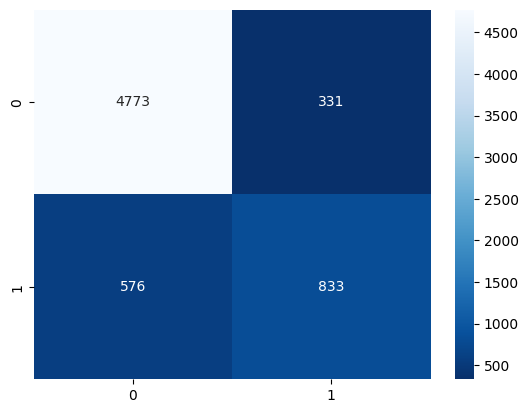

In [ ]:
# cm visualization
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

cm_test = confusion_matrix(y_test, y_pred_test)
f = sns.heatmap(cm_test, annot=True,cmap="Blues_r", fmt='g')
print ("True Negative  : ",tn)
print ("False Positive : ",fp)
print ("False Negative : ",fn)
print ("True Positive  : ",tp)

In [ ]:
print(classification_report(y_test, y_pred_test, digits = 3))

              precision    recall  f1-score   support

           0      0.892     0.935     0.913      5104
           1      0.716     0.591     0.647      1409

    accuracy                          0.861      6513
   macro avg      0.804     0.763     0.780      6513
weighted avg      0.854     0.861     0.856      6513



###Adult TVAE

In [ ]:
# Umcodierung Spalte income in 0 und 1
income_map = {'>50K': 1, '<=50K': 0}
adultSyntheticTVAE['income'] = adultSyntheticTVAE['income'].map(income_map)
adultSyntheticTVAE.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   26   Private  262599  Some-college             10  Never-married   
1   42   Private  142859   Prof-school             15      Separated   
2   38   Private  162489     Assoc-voc             11      Separated   
3   21   Private  143778     Assoc-voc             11  Never-married   
4   21   Private  182596       HS-grad              9  Never-married   

      occupation   relationship                race     sex  capital.gain  \
0   Adm-clerical  Not-in-family               White  Female             1   
1              ?      Unmarried               White  Female             1   
2   Adm-clerical  Not-in-family  Asian-Pac-Islander  Female             1   
3  Other-service  Not-in-family               Black    Male             0   
4  Other-service      Own-child               White    Male             5   

   capital.loss  hours.per.week native.country  income  
0             0              40  United-States       0  
1             0              40  United-States       0  
2             0              40  United-States       0  
3             0              40  United-States       0  
4             0              13  United-States       0

In [ ]:
# One-Hot-Encoding
adultTVAEEncoded = pd.get_dummies(adultSyntheticTVAE)
adultTVAEEncoded.head()

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
0   26  262599             10             1             0              40   
1   42  142859             15             1             0              40   
2   38  162489             11             1             0              40   
3   21  143778             11             0             0              40   
4   21  182596              9             5             0              13   

   income  workclass_?  workclass_Federal-gov  workclass_Local-gov  ...  \
0       0            0                      0                    0  ...   
1       0            0                      0                    0  ...   
2       0            0                      0                    0  ...   
3       0            0                      0                    0  ...   
4       0            0                      0                    0  ...   

   sex_Female  sex_Male  native.country_China  native.country_India  \
0           1         0                     0                     0   
1           1         0                     0                     0   
2           1         0                     0                     0   
3           0         1                     0                     0   
4           0         1                     0                     0   

   native.country_Mexico  native.country_Philippines  native.country_South  \
0                      0                           0                     0   
1                      0                           0                     0   
2                      0                           0                     0   
3                      0                           0                     0   
4                      0                           0                     0   

   native.country_Taiwan  native.country_United-States  native.country_Vietnam  
0                      0                             1                       0  
1                      0                             1                       0  
2                      0                             1                       0  
3                      0                             1                       0  
4                      0                             1                       0  

[5 rows x 70 columns]

In [ ]:
# Aufteilung in Features und Labels
X = adultTVAEEncoded.drop('income', axis=1)  # alle Merkmale ohne das Ziel (target) auswählen
y = adultTVAEEncoded['income']  # Ziel (target) auswählen

In [ ]:
X

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
0       26  262599             10             1             0              40   
1       42  142859             15             1             0              40   
2       38  162489             11             1             0              40   
3       21  143778             11             0             0              40   
4       21  182596              9             5             0              13   
...    ...     ...            ...           ...           ...             ...   
32556   22  334728             11             3             1              40   
32557   25   84381              9             1             0              40   
32558   31  214732             11             0             0              40   
32559   29   56668              4             4             0              40   
32560   35  134268              7          4045             0              40   

       workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0                0                      0                    0   
1                0                      0                    0   
2                0                      0                    0   
3                0                      0                    0   
4                0                      0                    0   
...            ...                    ...                  ...   
32556            0                      0                    0   
32557            0                      0                    0   
32558            0                      0                    0   
32559            0                      0                    0   
32560            0                      0                    0   

       workclass_Never-worked  ...  sex_Female  sex_Male  \
0                           0  ...           1         0   
1                           0  ...           1         0   
2                           0  ...           1         0   
3                           0  ...           0         1   
4                           0  ...           0         1   
...                       ...  ...         ...       ...   
32556                       0  ...           1         0   
32557                       0  ...           0         1   
32558                       0  ...           0         1   
32559                       0  ...           1         0   
32560                       0  ...           0         1   

       native.country_China  native.country_India  native.country_Mexico  \
0                         0                     0                      0   
1                         0                     0                      0   
2                         0                     0                      0   
3                         0                     0                      0   
4                         0                     0                      0   
...                     ...                   ...                    ...   
32556                     0                     0                      0   
32557                     0                     0                      0   
32558                     0                     0                      0   
32559                     0                     0                      0   
32560                     0                     0                      0   

       native.country_Philippines  native.country_South  \
0                               0                     0   
1                               0                     0   
2                               0                     0   
3                               0                     0   
4                               0                     0   
...                           ...                   ...   
32556                           0                     0   
32557                           0                     0   
32558                           0                     0   
32559            

In [ ]:
# Aufteilung der Datensätze in Trainings- und Testdatensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape  # 20 % test set

((26048, 69), (26048,), (6513, 69), (6513,))

In [ ]:
# Erstellen des Entscheidungsbaums
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=150, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=150, random_state=42)

In [ ]:
# Extrahiere die Feature Importance des trainierten Modells
importance = clf.feature_importances_

In [ ]:
# Erstelle einen DataFrame, der die Features und ihre Importance enthält
feat_imp = pd.DataFrame({'Features': X.columns, 'Importance': importance})
# Sortieren des DataFrames
feat_imp = feat_imp.sort_values('Importance', ascending=False)

print(feat_imp.head(20))

                             Features  Importance
31  marital.status_Married-civ-spouse    0.458784
0                                 age    0.180526
3                        capital.gain    0.071003
4                        capital.loss    0.067495
5                      hours.per.week    0.043491
2                       education.num    0.041866
11             workclass_Self-emp-inc    0.029612
1                              fnlwgt    0.020381
12         workclass_Self-emp-not-inc    0.020184
43           occupation_Other-service    0.008682
48            occupation_Tech-support    0.007508
39         occupation_Exec-managerial    0.006781
51         relationship_Not-in-family    0.006570
58                         race_White    0.005831
59                         sex_Female    0.003225
53             relationship_Own-child    0.003114
38            occupation_Craft-repair    0.002998
10                  workclass_Private    0.002964
7               workclass_Federal-gov    0.002380


In [ ]:
# Vorhersage auf den Testdaten
y_pred = clf.predict(X_test)

In [ ]:
# Ausgabe der Genauigkeit des Entscheidungsbaums auf den Testdaten
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.8719484108705665


In [ ]:
y_pred_test = clf.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[4800,  366],
       [ 468,  879]])

True Negative  :  4800
False Positive :  366
False Negative :  468
True Positive  :  879


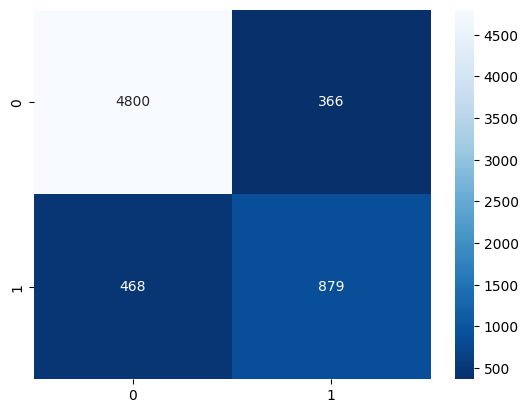

In [ ]:
# cm visualization
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

cm_test = confusion_matrix(y_test, y_pred_test)
f = sns.heatmap(cm_test, annot=True,cmap="Blues_r", fmt='g')
print ("True Negative  : ",tn)
print ("False Positive : ",fp)
print ("False Negative : ",fn)
print ("True Positive  : ",tp)

In [ ]:
print(classification_report(y_test, y_pred_test, digits = 3))

              precision    recall  f1-score   support

           0      0.911     0.929     0.920      5166
           1      0.706     0.653     0.678      1347

    accuracy                          0.872      6513
   macro avg      0.809     0.791     0.799      6513
weighted avg      0.869     0.872     0.870      6513



###Diabetes Baseline

In [ ]:
diabetesEncoded = pd.get_dummies(diabetes)
diabetesEncoded.head()

age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Female  gender_Male  gender_Other  \
0         0              1            0             0   
1         0              1            0             0   
2         0              0            1             0   
3         0              1            0             0   
4         0              0            1             0   

   smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                        0                        0                     0   
1                        1                        0                     0   
2                        0                        0                     0   
3                        0                        1                     0   
4                        0                        1                     0   

   smoking_history_former  smoking_history_never  smoking_history_not current  
0                       0                      1                            0  
1                       0                      0                            0  
2                       0                      1                            0  
3                       0                      0                            0  
4                       0                      0                            0

In [ ]:
# Aufteilung in Features und Labels
X = diabetesEncoded.drop('diabetes', axis=1)  # alle Merkmale ohne das Ziel (target) auswählen
y = diabetesEncoded['diabetes']  # Ziel (target) auswählen

In [ ]:
X

age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99995  80.0             0              0  27.32          6.2   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  gender_Female  gender_Male  gender_Other  \
0                      140              1            0             0   
1                       80              1            0             0   
2                      158              0            1             0   
3                      155              1            0             0   
4                      155              0            1             0   
...                    ...            ...          ...           ...   
99995                   90              1            0             0   
99996                  100              1            0             0   
99997                  155              0            1             0   
99998                  100              1            0             0   
99999                   90              1            0             0   

       smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                            0                        0                     0   
1                            1                        0                     0   
2                            0                        0                     0   
3                            0                        1                     0   
4                            0                        1                     0   
...                        ...                      ...                   ...   
99995                        1                        0                     0   
99996                        1                        0                     0   
99997                        0                        0                     0   
99998                        0                        0                     0   
99999                        0                        1                     0   

       smoking_history_former  smoking_history_never  \
0                           0                      1   
1                           0                      0   
2                           0                      1   
3                           0                      0   
4                           0                      0   
...                       ...                    ...   
99995                       0                      0   
99996                       0                      0   
99997                       1                      0   
99998                       0                      1   
99999                       0                      0   

       smoking_history_not current  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  
...                            ...  
99995                            0  
99996                            0  
99997                            0  
99998                            0  
99999                            0  

[100000 rows x 15 columns]

In [ ]:
# Aufteilung der Datensätze in Trainings- und Testdatensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape  # 20 % test set

((80000, 15), (80000,), (20000, 15), (20000,))

In [ ]:
# Erstellen des Entscheidungsbaums
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=25, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=25, random_state=42)

In [ ]:
# Extrahiere die Feature Importance des trainierten Modells
importance = clf.feature_importances_

In [ ]:
# Erstelle einen DataFrame, der die Features und ihre Importance enthält
feat_imp = pd.DataFrame({'Features': X.columns, 'Importance': importance})
# Sortieren des DataFrames
feat_imp = feat_imp.sort_values('Importance', ascending=False)

print(feat_imp.head)

<bound method NDFrame.head of                        Features  Importance
4                   HbA1c_level    0.640443
5           blood_glucose_level    0.320669
0                           age    0.015097
3                           bmi    0.014918
1                  hypertension    0.004077
2                 heart_disease    0.003899
9       smoking_history_No Info    0.000897
6                 gender_Female    0.000000
7                   gender_Male    0.000000
8                  gender_Other    0.000000
10      smoking_history_current    0.000000
11         smoking_history_ever    0.000000
12       smoking_history_former    0.000000
13        smoking_history_never    0.000000
14  smoking_history_not current    0.000000>


In [ ]:
# Vorhersage auf den Testdaten
y_pred = clf.predict(X_test)

In [ ]:
# Ausgabe der Genauigkeit des Entscheidungsbaums auf den Testdaten
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.9722


In [ ]:
y_pred_test = clf.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[18279,    13],
       [  543,  1165]])

True Negative  :  18279
False Positive :  13
False Negative :  543
True Positive  :  1165


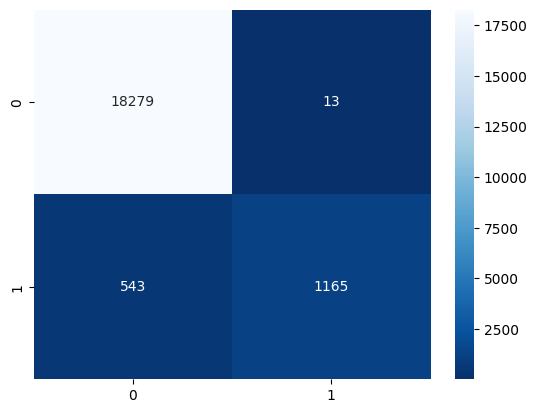

In [ ]:
# cm visualization
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

cm_test = confusion_matrix(y_test, y_pred_test)
f = sns.heatmap(cm_test, annot=True,cmap="Blues_r", fmt='g')
print ("True Negative  : ",tn)
print ("False Positive : ",fp)
print ("False Negative : ",fn)
print ("True Positive  : ",tp)

In [ ]:
print(classification_report(y_test, y_pred_test, digits = 3))

              precision    recall  f1-score   support

           0      0.971     0.999     0.985     18292
           1      0.989     0.682     0.807      1708

    accuracy                          0.972     20000
   macro avg      0.980     0.841     0.896     20000
weighted avg      0.973     0.972     0.970     20000



###Diabetes CTGAN

In [ ]:
# One-Hot-Encoding
diabetesCTGANEncoded = pd.get_dummies(diabetesSyntheticCTGAN)
diabetesCTGANEncoded.head()

age  hypertension  heart_disease    bmi  HbA1c_level  \
0  80.00             1              1  27.36          6.2   
1  39.83             0              0  25.40          6.1   
2  20.25             0              0  21.89          6.2   
3  73.53             1              0  49.59          8.8   
4  54.73             0              0  30.41          6.6   

   blood_glucose_level  diabetes  gender_Female  gender_Male  gender_Other  \
0                  155         1              1            0             0   
1                  127         0              0            1             0   
2                  199         0              1            0             0   
3                  300         1              0            1             0   
4                  128         0              1            0             0   

   smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                        0                        0                     0   
1                        0                        0                     0   
2                        0                        0                     0   
3                        0                        0                     0   
4                        0                        0                     0   

   smoking_history_former  smoking_history_never  smoking_history_not current  
0                       1                      0                            0  
1                       0                      1                            0  
2                       0                      1                            0  
3                       0                      1                            0  
4                       1                      0                            0

In [ ]:
# Aufteilung in Features und Labels
X = diabetesCTGANEncoded.drop('diabetes', axis=1)  # alle Merkmale ohne das Ziel (target) auswählen
y = diabetesCTGANEncoded['diabetes']  # Ziel (target) auswählen

In [ ]:
X

age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.00             1              1  27.36          6.2   
1      39.83             0              0  25.40          6.1   
2      20.25             0              0  21.89          6.2   
3      73.53             1              0  49.59          8.8   
4      54.73             0              0  30.41          6.6   
...      ...           ...            ...    ...          ...   
99995  79.36             0              0  24.58          6.6   
99996  46.86             1              0  44.96          7.8   
99997  49.52             0              0  52.06          4.0   
99998  51.35             0              0  28.78          5.0   
99999  33.32             0              0  29.86          4.8   

       blood_glucose_level  gender_Female  gender_Male  gender_Other  \
0                      155              1            0             0   
1                      127              0            1             0   
2                      199              1            0             0   
3                      300              0            1             0   
4                      128              1            0             0   
...                    ...            ...          ...           ...   
99995                  143              1            0             0   
99996                  300              0            1             0   
99997                  201              1            0             0   
99998                  143              0            1             0   
99999                   83              1            0             0   

       smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                            0                        0                     0   
1                            0                        0                     0   
2                            0                        0                     0   
3                            0                        0                     0   
4                            0                        0                     0   
...                        ...                      ...                   ...   
99995                        0                        1                     0   
99996                        0                        0                     0   
99997                        0                        0                     0   
99998                        0                        0                     0   
99999                        0                        1                     0   

       smoking_history_former  smoking_history_never  \
0                           1                      0   
1                           0                      1   
2                           0                      1   
3                           0                      1   
4                           1                      0   
...                       ...                    ...   
99995                       0                      0   
99996                       0                      1   
99997                       1                      0   
99998                       0                      0   
99999                       0                      0   

       smoking_history_not current  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  
...                            ...  
99995                            0  
99996                            0  
99997                            0  
99998                            1  
99999                            0  

[100000 rows x 15 columns]

In [ ]:
# Aufteilung der Datensätze in Trainings- und Testdatensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape  # 20 % test set

((80000, 15), (80000,), (20000, 15), (20000,))

In [ ]:
# Erstellen des Entscheidungsbaums
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=25, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=25, random_state=42)

In [ ]:
# Extrahiere die Feature Importance des trainierten Modells
importance = clf.feature_importances_

In [ ]:
# Erstelle einen DataFrame, der die Features und ihre Importance enthält
feat_imp = pd.DataFrame({'Features': X.columns, 'Importance': importance})
# Sortieren des DataFrames
feat_imp = feat_imp.sort_values('Importance', ascending=False)

print(feat_imp)

                       Features  Importance
4                   HbA1c_level    0.731959
3                           bmi    0.120432
0                           age    0.083283
5           blood_glucose_level    0.037641
1                  hypertension    0.026685
2                 heart_disease    0.000000
6                 gender_Female    0.000000
7                   gender_Male    0.000000
8                  gender_Other    0.000000
9       smoking_history_No Info    0.000000
10      smoking_history_current    0.000000
11         smoking_history_ever    0.000000
12       smoking_history_former    0.000000
13        smoking_history_never    0.000000
14  smoking_history_not current    0.000000


In [ ]:
# Vorhersage auf den Testdaten
y_pred = clf.predict(X_test)

In [ ]:
# Ausgabe der Genauigkeit des Entscheidungsbaums auf den Testdaten
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.9386


In [ ]:
y_pred_test = clf.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[17488,   355],
       [  873,  1284]])

True Negative  :  17488
False Positive :  355
False Negative :  873
True Positive  :  1284


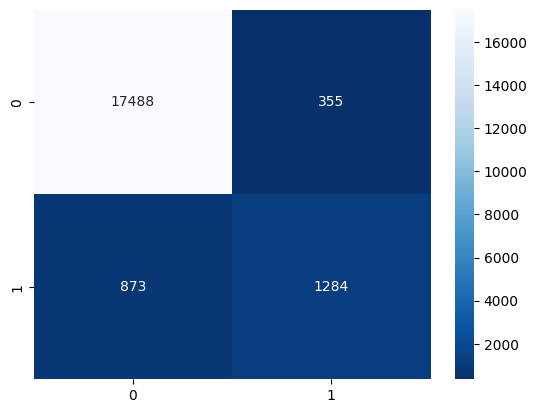

In [ ]:
# cm visualization
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

cm_test = confusion_matrix(y_test, y_pred_test)
f = sns.heatmap(cm_test, annot=True,cmap="Blues_r", fmt='g')
print ("True Negative  : ",tn)
print ("False Positive : ",fp)
print ("False Negative : ",fn)
print ("True Positive  : ",tp)

In [ ]:
print(classification_report(y_test, y_pred_test, digits = 3))

              precision    recall  f1-score   support

           0      0.952     0.980     0.966     17843
           1      0.783     0.595     0.677      2157

    accuracy                          0.939     20000
   macro avg      0.868     0.788     0.821     20000
weighted avg      0.934     0.939     0.935     20000



###Diabetes TVAE

In [ ]:
# One-Hot-Encoding
diabetesTVAEEncoded = pd.get_dummies(diabetesSyntheticTVAE)
diabetesTVAEEncoded.head()

age  hypertension  heart_disease    bmi  HbA1c_level  \
0  46.04             0              0  27.32          5.7   
1   3.98             0              0  16.33          6.0   
2  32.70             0              0  29.23          3.5   
3  38.27             0              0  23.54          6.5   
4  34.70             0              0  34.88          6.6   

   blood_glucose_level  diabetes  gender_Female  gender_Male  \
0                  141         0              0            1   
1                  159         0              0            1   
2                  145         0              1            0   
3                   85         0              0            1   
4                  159         0              1            0   

   smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                        0                        1                     0   
1                        0                        0                     0   
2                        0                        0                     0   
3                        0                        0                     0   
4                        1                        0                     0   

   smoking_history_former  smoking_history_never  smoking_history_not current  
0                       0                      0                            0  
1                       0                      1                            0  
2                       0                      0                            1  
3                       0                      1                            0  
4                       0                      0                            0

In [ ]:
# Aufteilung in Features und Labels
X = diabetesTVAEEncoded.drop('diabetes', axis=1)  # alle Merkmale ohne das Ziel (target) auswählen
y = diabetesTVAEEncoded['diabetes']  # Ziel (target) auswählen

In [ ]:
X

age  hypertension  heart_disease    bmi  HbA1c_level  \
0      46.04             0              0  27.32          5.7   
1       3.98             0              0  16.33          6.0   
2      32.70             0              0  29.23          3.5   
3      38.27             0              0  23.54          6.5   
4      34.70             0              0  34.88          6.6   
...      ...           ...            ...    ...          ...   
99995  37.70             0              0  27.20          3.5   
99996  50.02             0              0  39.23          5.7   
99997  63.10             0              0  27.32          6.6   
99998  57.70             0              0  28.99          6.0   
99999   0.83             0              0  16.74          4.5   

       blood_glucose_level  gender_Female  gender_Male  \
0                      141              0            1   
1                      159              0            1   
2                      145              1            0   
3                       85              0            1   
4                      159              1            0   
...                    ...            ...          ...   
99995                  155              1            0   
99996                  130              1            0   
99997                  159              1            0   
99998                  155              0            1   
99999                  155              1            0   

       smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                            0                        1                     0   
1                            0                        0                     0   
2                            0                        0                     0   
3                            0                        0                     0   
4                            1                        0                     0   
...                        ...                      ...                   ...   
99995                        0                        0                     0   
99996                        0                        0                     0   
99997                        0                        0                     0   
99998                        0                        0                     0   
99999                        1                        0                     0   

       smoking_history_former  smoking_history_never  \
0                           0                      0   
1                           0                      1   
2                           0                      0   
3                           0                      1   
4                           0                      0   
...                       ...                    ...   
99995                       0                      1   
99996                       0                      1   
99997                       0                      1   
99998                       0                      1   
99999                       0                      0   

       smoking_history_not current  
0                                0  
1                                0  
2                                1  
3                                0  
4                                0  
...                            ...  
99995                            0  
99996                            0  
99997                            0  
99998                            0  
99999                            0  

[100000 rows x 14 columns]

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    1
99997    1
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [ ]:
# Aufteilung der Datensätze in Trainings- und Testdatensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape  # 20 % test set

((80000, 14), (80000,), (20000, 14), (20000,))

In [ ]:
# Erstellen des Entscheidungsbaums
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=25, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=25, random_state=42)

In [ ]:
# Extrahiere die Feature Importance des trainierten Modells
importance = clf.feature_importances_

In [ ]:
# Erstelle einen DataFrame, der die Features und ihre Importance enthält
feat_imp = pd.DataFrame({'Features': X.columns, 'Importance': importance})
# Sortieren des DataFrames
feat_imp = feat_imp.sort_values('Importance', ascending=False)

print(feat_imp)

                       Features  Importance
5           blood_glucose_level    0.519350
4                   HbA1c_level    0.291323
3                           bmi    0.116916
0                           age    0.065663
7                   gender_Male    0.005202
11       smoking_history_former    0.001546
1                  hypertension    0.000000
2                 heart_disease    0.000000
6                 gender_Female    0.000000
8       smoking_history_No Info    0.000000
9       smoking_history_current    0.000000
10         smoking_history_ever    0.000000
12        smoking_history_never    0.000000
13  smoking_history_not current    0.000000


In [ ]:
# Vorhersage auf den Testdaten
y_pred = clf.predict(X_test)

In [ ]:
# Ausgabe der Genauigkeit des Entscheidungsbaums auf den Testdaten
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.95595


In [ ]:
y_pred_test = clf.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[18318,   108],
       [  773,   801]])

True Negative  :  18318
False Positive :  108
False Negative :  773
True Positive  :  801


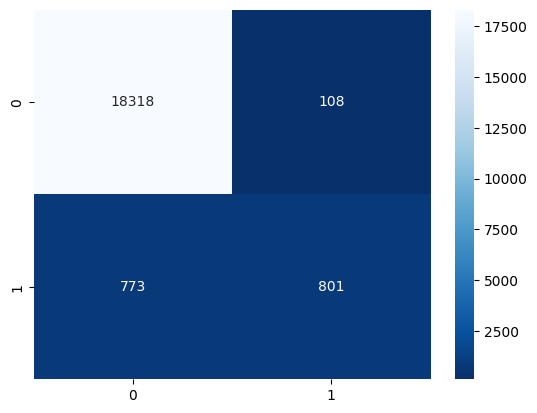

In [ ]:
# cm visualization
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

cm_test = confusion_matrix(y_test, y_pred_test)
f = sns.heatmap(cm_test, annot=True,cmap="Blues_r", fmt='g')
print ("True Negative  : ",tn)
print ("False Positive : ",fp)
print ("False Negative : ",fn)
print ("True Positive  : ",tp)

In [ ]:
print(classification_report(y_test, y_pred_test, digits = 3))

              precision    recall  f1-score   support

           0      0.960     0.994     0.977     18426
           1      0.881     0.509     0.645      1574

    accuracy                          0.956     20000
   macro avg      0.920     0.752     0.811     20000
weighted avg      0.953     0.956     0.950     20000

